# Find differences

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [2]:
file_path = 'projects_list.xlsx'
sheet1_name = 'rater_1'
sheet2_name = 'rater_2'

df1 = pd.read_excel(file_path, sheet_name=sheet1_name)
df2 = pd.read_excel(file_path, sheet_name=sheet2_name)
df2.set_index(df1.index, inplace=True)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [4]:
category_series_1 = df1['TravisCategory'].astype(str).str.lower()
category_series_2 = df2['TravisCategory'].astype(str).str.lower()

different_rows = pd.DataFrame(columns=df2.columns)
new_index = 0

for i in range(df2.shape[0]):
    categories1 = category_series_1[i]
    categories2 = category_series_2[i]
    row_to_add = df2.iloc[i]
    
    if categories1 != categories2:
        different_rows.loc[new_index] = row_to_add
        different_rows.at[new_index, 'TravisCategory'] = str(categories1)
        different_rows.at[new_index, 'differences'] = str(categories2)
        project = df1['ProjectName'].astype(str)[i]
        commit_hash = df1['CommitID'].astype(str)[i]
        new_index += 1
        
with pd.ExcelWriter(f'different_cats_2.xlsx', engine='openpyxl') as writer:
   different_rows.to_excel(writer, sheet_name='result1', index=True)

C:\Users\csiala\AppData\Local\Temp\1\ipykernel_788\3231161190.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'maintainability' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  different_rows.at[new_index, 'differences'] = str(categories2)


In [5]:
kappa = cohen_kappa_score(category_series_1, category_series_2)

print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.7274080282056469


# Analysis using graphs for Sample commits

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import pandas as pd

In [7]:
file_path = 'RQ1_ci_evolution.xlsx'
sheet1_name = 'agreement'

df = pd.read_excel(file_path, sheet_name=sheet1_name)

In [8]:
df['NormalizedCategory'] = df['TravisCategory-Labeler1'].str.lower()

# Count occurrences of each normalized category
category_counts = df['NormalizedCategory'].value_counts()

# Calculate percentages
category_percentages = category_counts / category_counts.sum() * 100

# Create a dictionary with categories as keys and their percentages as values
result_dict = category_percentages.to_dict()

print(result_dict)

{'build policy': 61.80758017492711, 'maintainability': 13.702623906705538, 'infrastructure': 9.329446064139942, 'performance': 8.454810495626822, 'dashboard/notifications': 2.3323615160349855, 'security': 2.3323615160349855, 'build process organization': 2.0408163265306123}


In [9]:
categories = ['build policy', 'build process organization', 'dashboard/notifications',
              'infrastructure', 'maintainability', 'performance', 'security']
sorted_list = sorted(result_dict, key=lambda x: categories.index(x))
ml_commits = [(key, result_dict[key]) for key in sorted_list]

oss_commits = [9.13, 22.83, 7.69, 0.72, 28.60, 31.00, 1.20] # Taken from (Zampetti et al.)

categories = [word.title() for word in categories]

# Sort data and categories
sorted_indices = np.argsort(ml_commits)[::-1]
sorted_categories = [categories[i] for i in sorted_indices]
sorted_ml_commits = [ml_commits[i] for i in sorted_indices]
sorted_oss_commits = [oss_commits[i] for i in sorted_indices]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


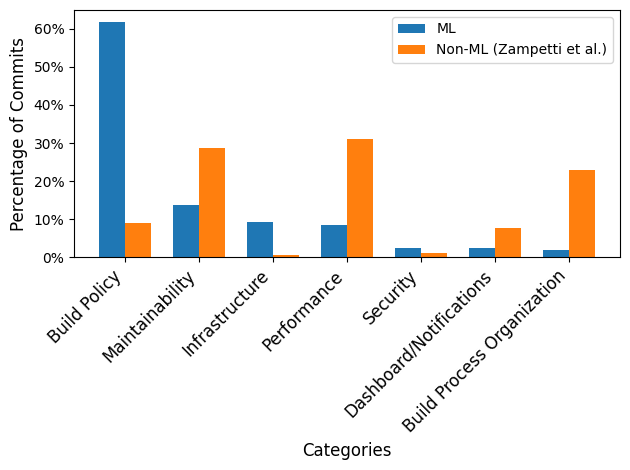

In [12]:
x = np.arange(len(sorted_categories))
bar_width = 0.35

fig, ax = plt.subplots()

ax.bar(x - bar_width/2, sorted_ml_commits, bar_width, label='ML')

# Plot non-ML commits
ax.bar(x + bar_width/2, sorted_oss_commits, bar_width, label='General OSS (Zampetti et al.)')

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(sorted_categories, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Percentage of Commits', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

ax.legend()

# Save the plot as an EPS file
plt.savefig('rq1_distribution.eps', format='eps', bbox_inches='tight')

plt.tight_layout()
plt.show()